# SALES PREDICTION USING PYTHON 

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Loading Dataset 

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Preprocessing the Data 

In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='Newspaper'>

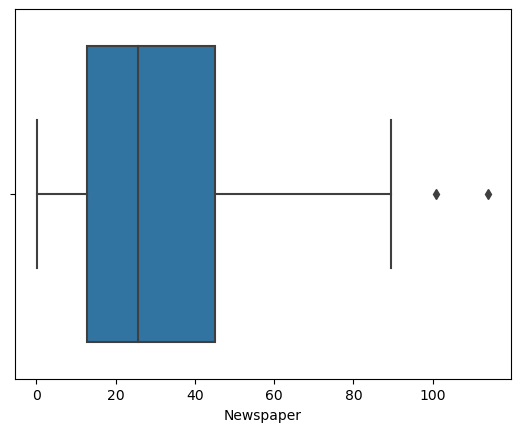

In [8]:
sns.boxplot(x = data['Newspaper'])

<AxesSubplot:xlabel='TV'>

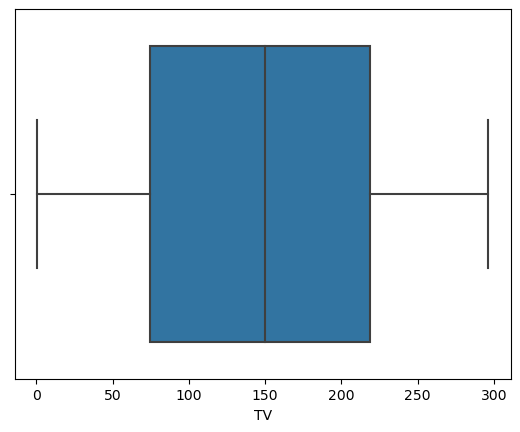

In [9]:
sns.boxplot(x = data['TV'])

<AxesSubplot:xlabel='Radio'>

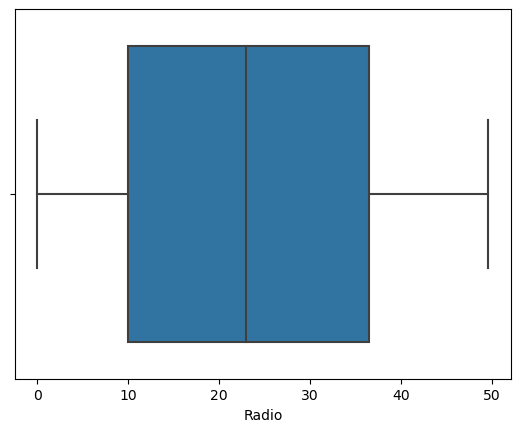

In [10]:
sns.boxplot(x = data['Radio'])

In [7]:
outlier_threshold = 90

data = data[data['Newspaper'] <= outlier_threshold]

F:\program files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

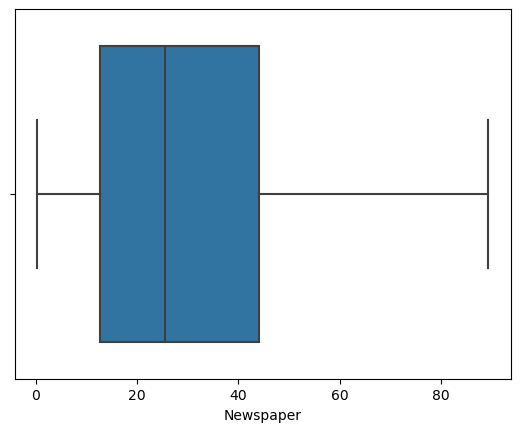

In [12]:
sns.boxplot(data['Newspaper'])

In [13]:
data.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


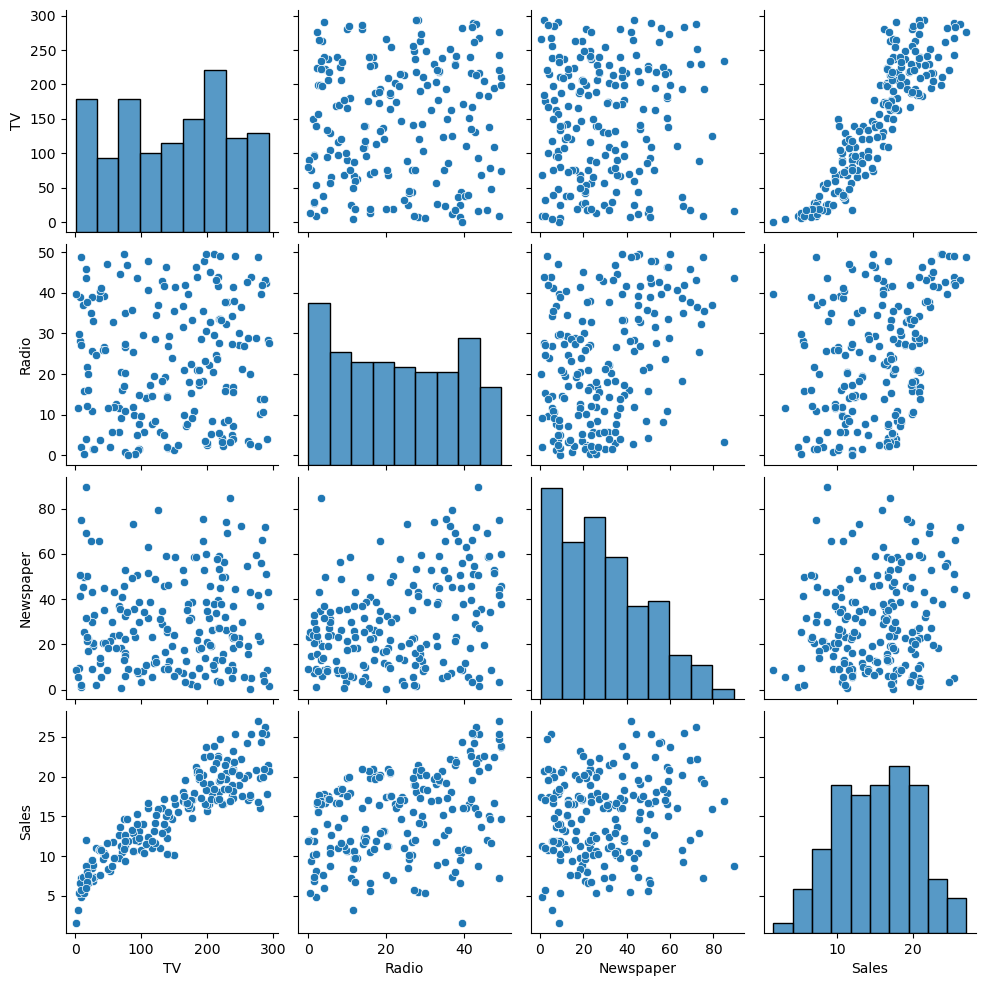

In [14]:
sns.pairplot(data)

<AxesSubplot:>

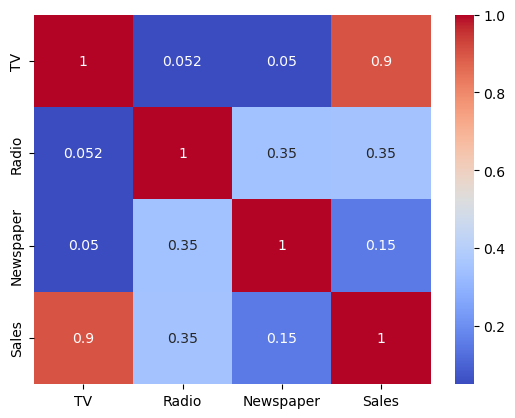

In [15]:
corr_mat = data.corr()

sns.heatmap(corr_mat, cmap = 'coolwarm', annot = True)

# Train Test Split 

In [8]:
x = data.drop(columns = 'Sales', axis = 1)
y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# Model Selection 

## Random Forest Regressor

In [17]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

y_pred = rfr_model.predict(x_test)
r2_score(y_test, y_pred)

0.9565363155517597

## K-Nearest Neighbors 

In [18]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)
r2_score(y_test, y_pred)

0.9015108023006664

## Linear Regression 

In [19]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)
r2_score(y_test, y_pred)

0.918941638628074

## Support Vector Machine 

In [20]:
svr_model = SVR()
svr_model.fit(x_train, y_train)

y_pred = svr_model.predict(x_test)
r2_score(y_test, y_pred)

0.8433596830744378

## XGBoost 

In [15]:
xgbr_model = xgb.XGBRegressor()
xgbr_model.fit(x_train, y_train)
y_pred = xgbr_model.predict(x_test)
r2_score(y_test, y_pred)

0.9558638498476749

## Lasso 

In [22]:
lasso_model = Lasso(alpha = 1.0)
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)
r2_score(y_test, y_pred)

0.9191616593942555

## Ridge 

In [23]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
r2_score(y_test, y_pred)

0.9189408950115039

# Hyperperameter tuning 

##  Random Search CV

In [24]:
param_dist = {
    'n_estimators' : randint(10,1000),
    'learning_rate' : uniform(0.01,0.3),
    'max_depth' : randint(3,100),
    'min_child_weight' : randint(1,50),
    'gamma' : uniform(0,1.0),
    'subsample' : uniform(0.6, 0.2),
    'colsample_bytree' : uniform(0.6,0.4)
}

xgbr = xgb.XGBRegressor(objective = 'reg:squarederror')

random_search = RandomizedSearchCV(xgbr, param_distributions =  param_dist, n_iter = 10, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1, n_jobs = 1, random_state = 0)

In [25]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CA7E3C78B0>,
    

In [26]:
random_search.best_params_

{'colsample_bytree': 0.75375268291708,
 'gamma': 0.2975346065444723,
 'learning_rate': 0.027013893195232952,
 'max_depth': 15,
 'min_child_weight': 2,
 'n_estimators': 496,
 'subsample': 0.7624337457550986}

In [27]:
best_model = random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75375268291708, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.2975346065444723,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.027013893195232952,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=496, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

r2_score(y_test, y_pred)

0.9063208248077722

# MODEL 

## XGBOOST 

In [17]:
xgbr_model.fit(x_train, y_train)
y_pred = xgbr_model.predict(x_test)

print('r2_score : ', r2_score(y_test, y_pred))
print('Mean squared error : ', mean_squared_error(y_test, y_pred) )
print('Mean Absolute error : ', mean_absolute_error(y_test, y_pred))

r2_score :  0.9558638498476749
Mean squared error :  1.3746027420341036
Mean Absolute error :  0.8681395928064982


# Based on the model Performance XGBOOST REGRESSOR has been selected as a model for SALES PREDICTION

## XGB REGRESSOR 

* r2_score =   0.9558638498476749
* Mean squared error =   1.3746027420341036
* Mean Absolute error  =  0.8681395928064982

# THANK YOU 